**Date:** 12-14-2020

This is an experiment for musical instrument audio classification. 
In this particular notebook, an unmodified MobileNet convolutional neural network architecture is used. 

### Mount to Google Drive, import depedencies, preprocess data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras   
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_path = '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/train'
test_path = '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test'

In [4]:
CLASS_LIST = ['Acoustic_guitar', 'Bass_drum', 'Cello', 'Clarinet', 'Double_bass', 'Flute', 'Hi_hat', 'Saxophone', 'Snare_drum', 'Violin_or_fiddle']

In [6]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(225, 225), classes=CLASS_LIST, batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(225, 225), classes=CLASS_LIST, batch_size=10)

Found 270 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


### Build model

In [7]:
original_model = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 2s 0us/step


In [8]:
model = Sequential()
for layer in original_model.layers: 
    model.add(layer)

model.pop()
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0

### Train the model

In [10]:
# import a utility library I created for modularity 
from google.colab import files
files.upload()

Saving my_keras_utils.py to my_keras_utils.py


{'my_keras_utils.py': b'"""\nFile: my_keras_utils.py \n-------------------\nIn this file, I store several useful utility functions\nI created for deep learning experiments using Keras.  \n"""\n\nimport cv2\nimport tensorflow as tf\nimport numpy as np\nimport matplotlib.pyplot as plt \nimport matplotlib.image as mpimg\n\n\ndef my_predict(model, image_path, img_size, classes):\n\t"""\n\tTakes in a file path for a singular image and a corresponding\n\tclass list and returns a prediction for that image. \n\tParameters: \n\t\t- model (Keras model): the Keras model that is to be used for the prediction \n\t\t- image_path (str): the path of the image\n\t\t- classes (list): a list of classes used in the Keras classification model \n\tReturns: \n\t\t- Predicted class \n\t\t- Probability of prediction \n\t"""\n\tshow_image(image_path)\n\tpreds = model.predict([prepare_color(image_path, img_size)])\n\tmax_prob = np.max(preds)\n\tmax_prob_index = np.argmax(preds)\n\tfinal_probability = max_prob * 

In [11]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit_generator(train_batches, steps_per_epoch=4, epochs=250, verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/250
4/4 - 16s - loss: 4.9342 - accuracy: 0.1500
Epoch 2/250
4/4 - 18s - loss: 3.4312 - accuracy: 0.3500
Epoch 3/250
4/4 - 14s - loss: 2.7533 - accuracy: 0.3750
Epoch 4/250
4/4 - 12s - loss: 1.6740 - accuracy: 0.5000
Epoch 5/250
4/4 - 6s - loss: 1.1925 - accuracy: 0.7250
Epoch 6/250
4/4 - 6s - loss: 1.2502 - accuracy: 0.6250
Epoch 7/250
4/4 - 7s - loss: 0.9595 - accuracy: 0.7250
Epoch 8/250
4/4 - 2s - loss: 1.7986 - accuracy: 0.6000
Epoch 9/250
4/4 - 4s - loss: 1.5210 - accuracy: 0.6750
Epoch 10/250
4/4 - 4s - loss: 1.2690 - accuracy: 0.8750
Epoch 11/250
4/4 - 4s - loss: 0.5287 - accuracy: 0.8500
Epoch 12/250
4/4 - 2s - loss: 0.3794 - accuracy: 0.9000
Epoch 13/250
4/4 - 2s - loss: 0.5465 - accuracy: 0.8250
Epoch 14/250
4/4 - 4s - loss: 0.6798 - accuracy: 0.8500
Epoch 15/250
4/4 - 1s - loss: 0.3974 - accuracy: 0.8750
Epoch 16/250
4/4 - 1s - loss: 0.5366 - accuracy: 0.8000
Epoch 17/250
4/4 - 1s - loss: 0.3

In [13]:
history_dict = history.history
print(history_dict.keys())
# to keep for later 
%store history_dict

dict_keys(['loss', 'accuracy'])
Stored 'history_dict' (dict)


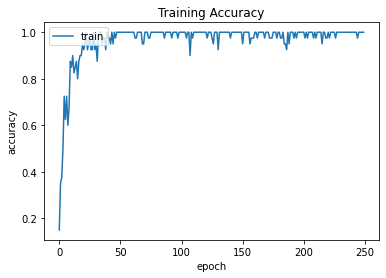

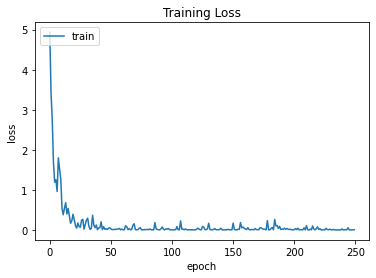

In [14]:
from my_keras_utils import plot_training
plot_training(history_dict)

#### Save the model

In [15]:
%cd '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification'

/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification


In [16]:
# Save the entire model to a separate google drive folder
!mkdir -p saved_models 
notebook_name ='MobileNet' # no '/' 
u_string = 'saved_models/' + notebook_name
model.save(u_string)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_models/MobileNet/assets


### Test

In [17]:
test_results = model.evaluate(test_batches)

3/3 [==============================] - 14s 5s/step - loss: 1.6385 - accuracy: 0.8333


In [19]:
model.metrics_names
test_results

[1.6385159492492676, 0.8333333134651184]

The model's accuracy on the test set is **83.3%** 

### Predictions

In [20]:
from my_keras_utils import my_predict

**Cello**:

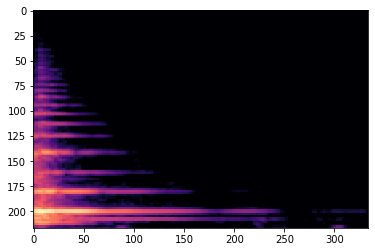

The class is Violin_or_fiddle predicted with a probability of 65.0598406791687 which rounds to 65.06%


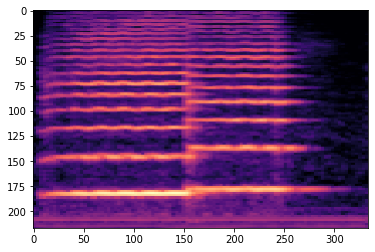

The class is Saxophone predicted with a probability of 93.04377436637878 which rounds to 93.04%


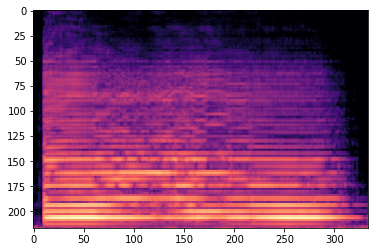

The class is Double_bass predicted with a probability of 92.41172671318054 which rounds to 92.41%


In [21]:
cello_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Cello/28.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Cello/29.png',
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Cello/30.png']

for img in cello_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**0/3**

**Clarinet**: 

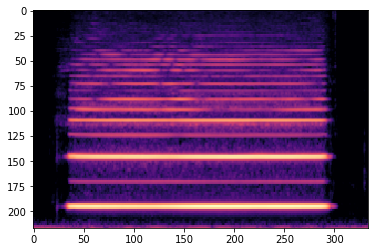

The class is Clarinet predicted with a probability of 82.40085244178772 which rounds to 82.4%


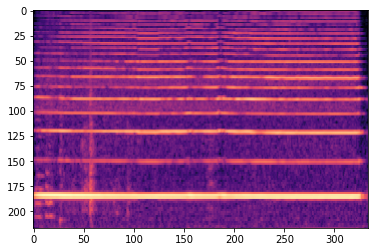

The class is Saxophone predicted with a probability of 99.48590993881226 which rounds to 99.49%


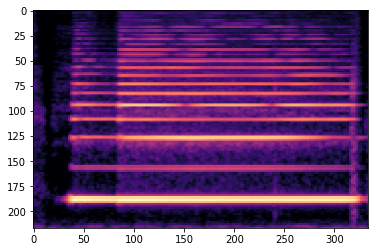

The class is Clarinet predicted with a probability of 80.93089461326599 which rounds to 80.93%


In [25]:
clarinet_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Clarinet/28.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Clarinet/29.png',
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Clarinet/30.png']

for img in clarinet_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**2/3** 

**Snare drum**: 

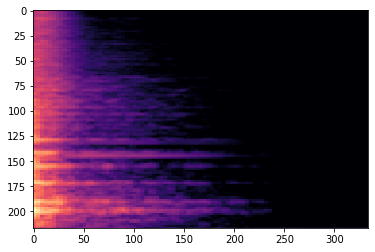

The class is Hi_hat predicted with a probability of 99.9204933643341 which rounds to 99.92%


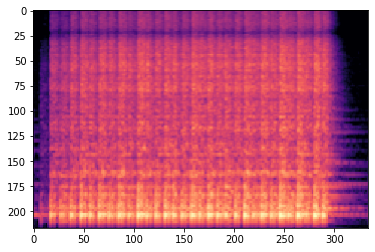

The class is Snare_drum predicted with a probability of 99.73257780075073 which rounds to 99.73%


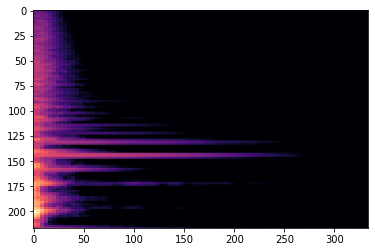

The class is Snare_drum predicted with a probability of 94.1403329372406 which rounds to 94.14%


In [26]:
snare_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Snare_drum/28.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Snare_drum/29.png',
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Snare_drum/30.png']

for img in snare_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**2/3**

**Acoustic guitar**:

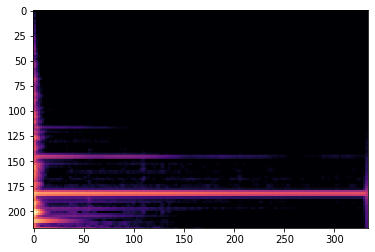

The class is Acoustic_guitar predicted with a probability of 65.56143760681152 which rounds to 65.56%


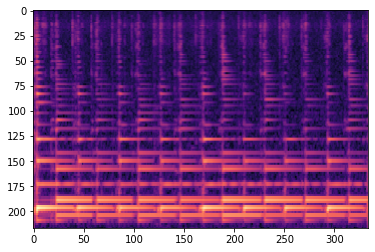

The class is Acoustic_guitar predicted with a probability of 99.38347339630127 which rounds to 99.38%


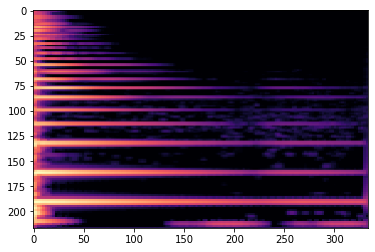

The class is Acoustic_guitar predicted with a probability of 99.9975323677063 which rounds to 100.0%


In [28]:
guitar_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Acoustic_guitar/28.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Acoustic_guitar/29.png',
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Acoustic_guitar/30.png']

for img in guitar_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**3/3**

**Bass drum**: 

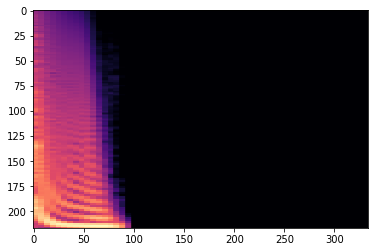

The class is Bass_drum predicted with a probability of 99.99524354934692 which rounds to 100.0%


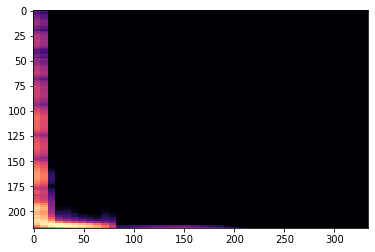

The class is Bass_drum predicted with a probability of 99.99995231628418 which rounds to 100.0%


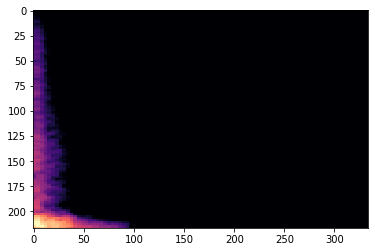

The class is Bass_drum predicted with a probability of 99.99709129333496 which rounds to 100.0%


In [29]:
bass_drum_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Bass_drum/28.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Bass_drum/29.png',
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Bass_drum/30.png']

for img in bass_drum_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**3/3**

**Double bass**:

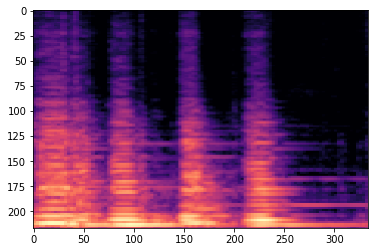

The class is Double_bass predicted with a probability of 99.99403953552246 which rounds to 99.99%


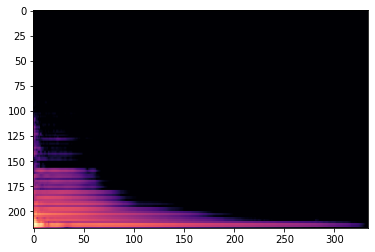

The class is Double_bass predicted with a probability of 99.99641180038452 which rounds to 100.0%


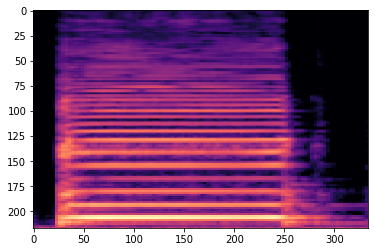

The class is Double_bass predicted with a probability of 100.0 which rounds to 100.0%


In [30]:
double_bass_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Double_bass/28.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Double_bass/29.png',
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Double_bass/30.png']

for img in double_bass_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**2/3**

**Flute**:

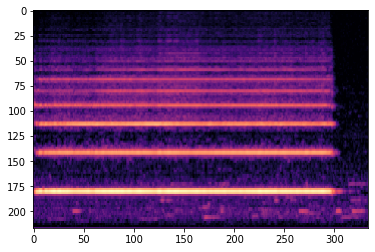

The class is Saxophone predicted with a probability of 53.43778133392334 which rounds to 53.44%


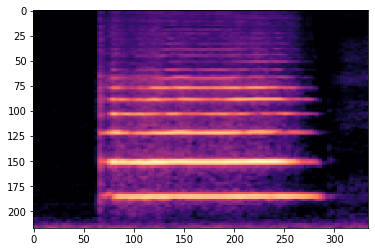

The class is Saxophone predicted with a probability of 53.56392860412598 which rounds to 53.56%


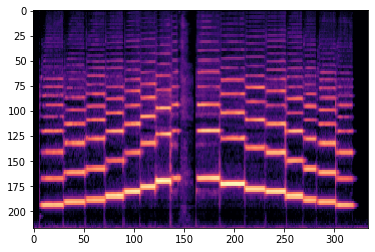

The class is Saxophone predicted with a probability of 98.0685830116272 which rounds to 98.07%


In [37]:
flute_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Flute/28.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Flute/29.png',
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Flute/30.png']

for img in flute_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**0/3**

**Hi hat**

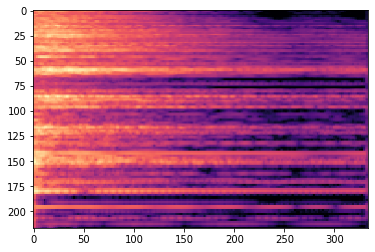

The class is Hi_hat predicted with a probability of 100.0 which rounds to 100.0%


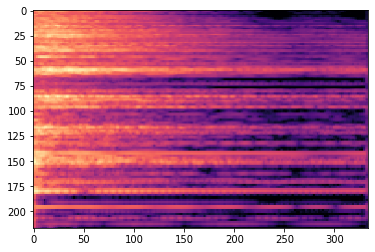

The class is Hi_hat predicted with a probability of 100.0 which rounds to 100.0%


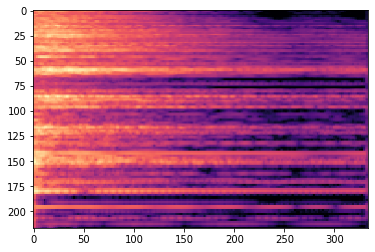

The class is Hi_hat predicted with a probability of 100.0 which rounds to 100.0%


In [38]:
hi_hat_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Hi_hat/28.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Hi_hat/28.png',
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Hi_hat/28.png']

for img in hi_hat_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**3/3**

**Saxophone**:

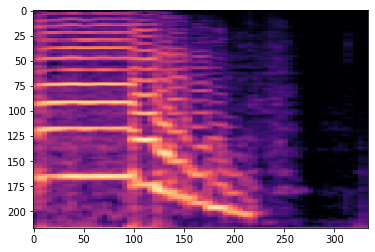

The class is Saxophone predicted with a probability of 64.46261405944824 which rounds to 64.46%


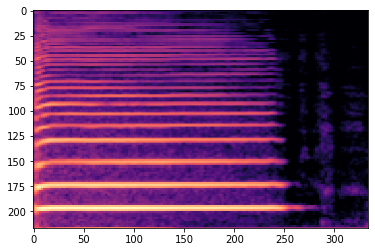

The class is Saxophone predicted with a probability of 99.97957348823547 which rounds to 99.98%


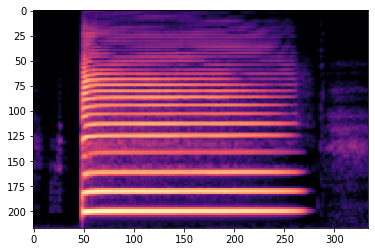

The class is Saxophone predicted with a probability of 99.65025186538696 which rounds to 99.65%


In [39]:
saxophone_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Saxophone/28.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Saxophone/29.png',
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Saxophone/30.png']

for img in saxophone_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**3/3**

**Violin/fiddle**: 

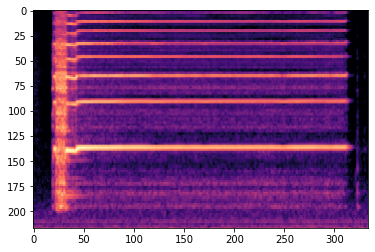

The class is Violin_or_fiddle predicted with a probability of 98.9973783493042 which rounds to 99.0%


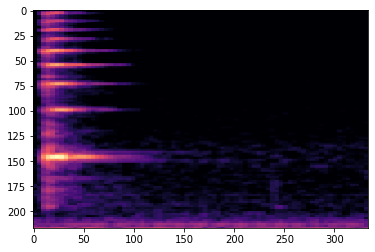

The class is Violin_or_fiddle predicted with a probability of 99.99880790710449 which rounds to 100.0%


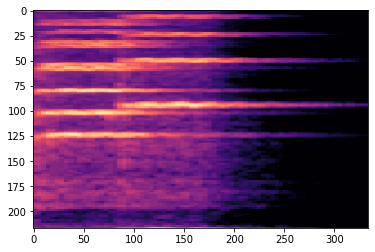

The class is Hi_hat predicted with a probability of 98.95144701004028 which rounds to 98.95%


In [40]:
violin_img_paths = ['/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Violin_or_fiddle/28.png', 
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Violin_or_fiddle/29.png',
                      '/content/drive/MyDrive/Machine Learning/projects/musical-instruments-classification/data_ma/test/Violin_or_fiddle/30.png']

for img in violin_img_paths:
  my_predict(model, img, 225, CLASS_LIST)

**2/3**

Overall, the model performed well on some classes, but poor on others. 